In [103]:
# ------------------- IMPORTACIÓN DE LIBRERÍAS -------------------

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
from PIL import Image

#SE ESTA USANDO PYTHON 3.7.9
#INTENTE VERSIONES MAS RECIENTES Y POR ALGUNA RAZON DABA ERROR USANDO NOTEBOOK, SI LO HACES .PY NO DEBERIA HABER PROBLEMA PERO POR COMODIDAD USAREMOS UN NOTEBOOK


In [104]:
# ------------------- PARTE 1: CARGA Y PREPARACIÓN DEL DATASET -------------------

# Cargar datos MNIST desde keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

'''
Normalizar los valores de píxel entre 0 y 1
0 Significa negro absoluto
255 Significa blanco absoluto
Valores intermedios representan tonos de gris
Entonces de [0, 255] pasamos a [0.0, 1.0]

Porque es importante?
    Mejora la estabilidad numérica del entrenamiento
    Evita que los valores grandes dominen el gradiente
'''
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

'''
# Redimensionar a (28, 28, 1) para CNN
-1: deja que NumPy infiera automáticamente el número de ejemplos (60000 en entrenamiento, 10000 en prueba).

28, 28: el tamaño de cada imagen.

1: representa una sola canal de color (escala de grises). Si fuera una imagen a color, ese número sería 3 (RGB).
'''
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


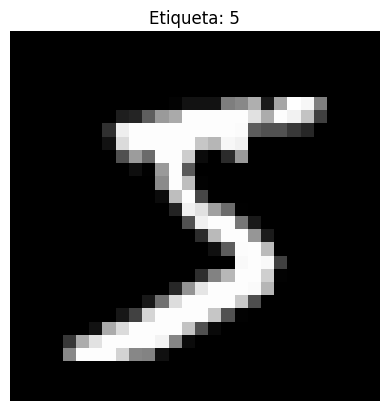

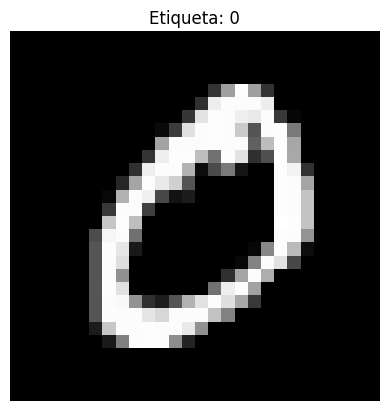

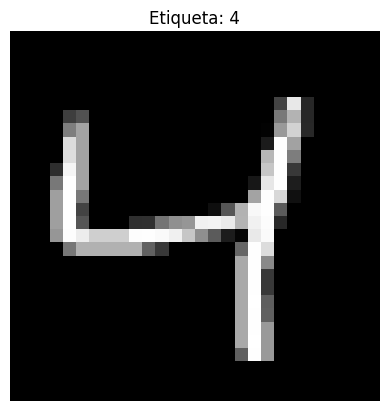

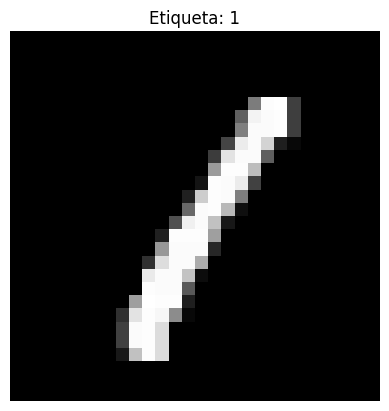

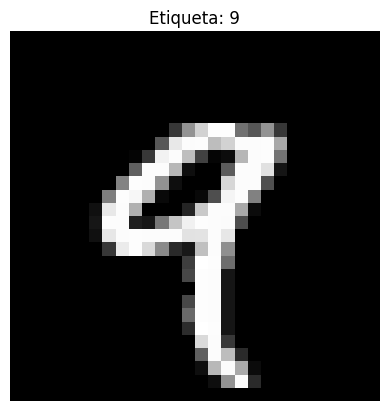

In [105]:
# Visualizar 5 imágenes de ejemplo con sus etiquetas
for i in range(5):
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')
    plt.show()


In [ ]:
# ------------------- PARTE 2: DEFINICIÓN DE LA ARQUITECTURA DE LA CNN -------------------

'''
Arquitectura solicitada
• Dos capas convolucionales (Conv2D) usando funciones de activación ReLU.
• Capas de MaxPooling2D.
• Una capa de Flatten.
• Al menos una capa Dense con activación ReLU.
• Una capa de salida con 10 unidades y activación softmax (para las 10 clases de
dígitos).
'''
model = Sequential()


model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1))) # Capa convolucional 1
model.add(MaxPooling2D(pool_size=(2,2))) #Esto sirve para reducir los datos que se pasan a la siguiente capa pero manteniendo las caracteristicas mas importante

  
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))# Capa convolucional 2
model.add(MaxPooling2D(pool_size=(2,2))) #Esto sirve para reducir los datos que se pasan a la siguiente capa pero manteniendo las caracteristicas mas importante

# Aplanamiento y capas densas
model.add(Flatten()) #Convierte una matriz 2D o 3D en un vector 1D. 
# Las capas convolucionales (Conv2D, MaxPooling2D, etc.) trabajan con tensores 2D o 3D (alto × ancho × canales).
# Pero las capas densas (Dense) solo aceptan vectores (1D) como entrada.
model.add(Dense(128, activation='relu')) # Aplica un cálculo con 128 neuronas aprendiendo combinaciones complejas de los patrones
model.add(Dense(10, activation='softmax')) # Esta es la capa de salida Tiene 10 neuronas, una por cada clase (0 a 9) Usa softmax para que la salida sea una probabilidad (cuál dígito es más probable)


In [ ]:
# Compilación del modelo con caracteristicas especificadas en el documento de las indicaciones
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Mostrar resumen del modelo
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [108]:
# ------------------- PARTE 3: ENTRENAMIENTO DEL MODELO -------------------

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1313 - accuracy: 0.9599 - val_loss: 0.0409 - val_accuracy: 0.9864
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0428 - accuracy: 0.9865 - val_loss: 0.0352 - val_accuracy: 0.9884
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.0307 - val_accuracy: 0.9902
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0219 - accuracy: 0.9931 - val_loss: 0.0298 - val_accuracy: 0.9901
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0157 - accuracy: 0.9949 - val_loss: 0.0285 - val_accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0127 - accuracy: 0.9961 - val_loss: 0.0381 - val_accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0093 - accuracy: 0.9970 - val_loss: 0.0324 - va

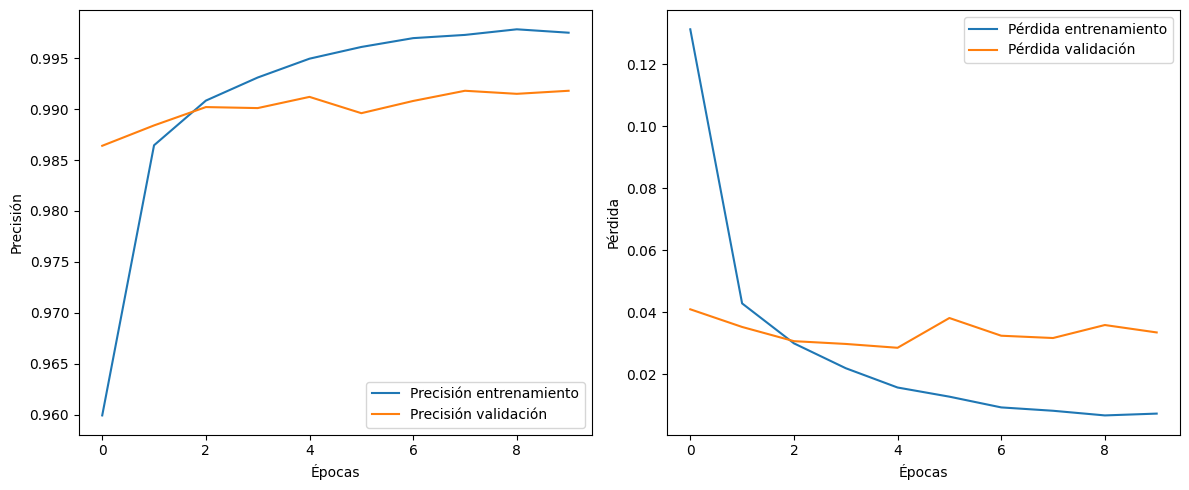

In [109]:
# Graficar precisión y pérdida del entrenamiento y validación
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


In [110]:
# ------------------- PARTE 4: EVALUACIÓN DEL MODELO -------------------

# Evaluar modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Precisión en test: {test_acc:.4f}")

# Predicciones
pred_labels = np.argmax(model.predict(x_test), axis=1)

# Reporte de clasificación y F1-score
print("Reporte de clasificación:")
print(classification_report(y_test, pred_labels))
print("F1-score promedio:", f1_score(y_test, pred_labels, average='macro'))


313/313 [==============================] - 1s 3ms/step - loss: 0.0335 - accuracy: 0.9918
Precisión en test: 0.9918
313/313 [==============================] - 1s 3ms/step
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

F1-score promedio: 0.9917554229062615


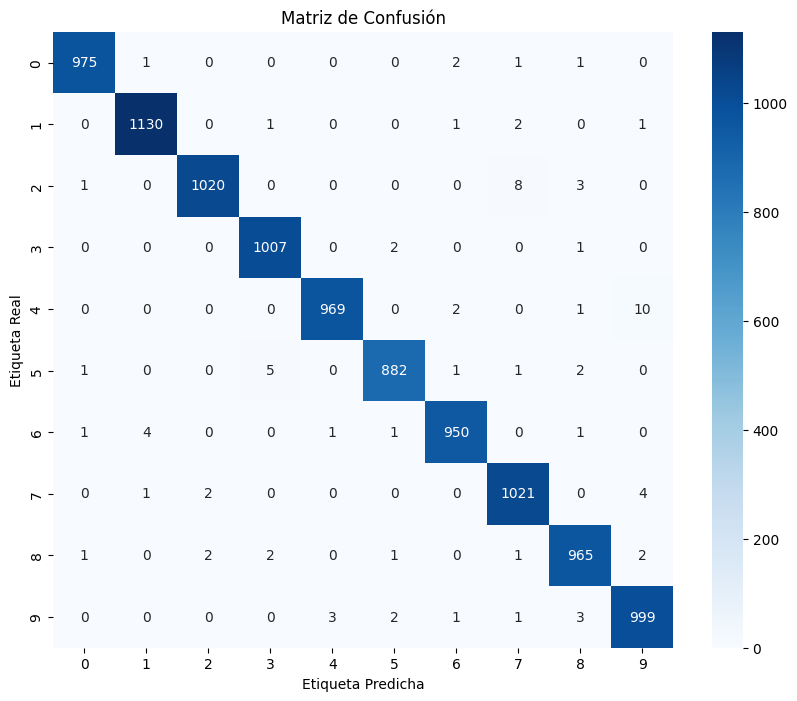

In [111]:
# Matriz de confusión
conf_mat = confusion_matrix(y_test, pred_labels)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()


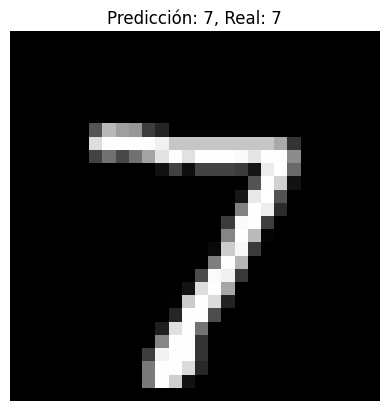

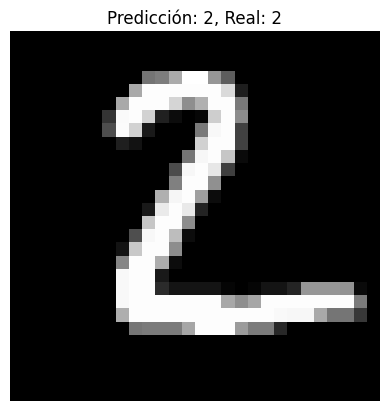

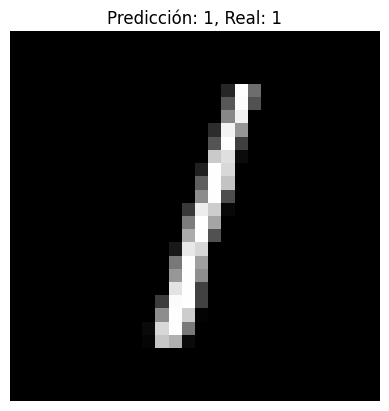

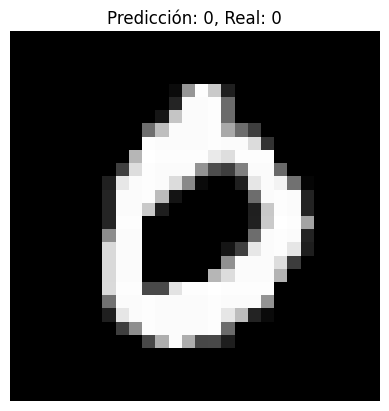

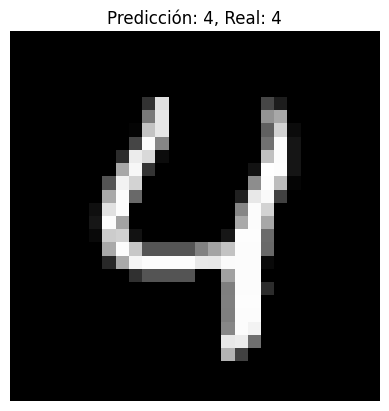

In [112]:
# Visualizar 5 predicciones con imagen
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicción: {pred_labels[i]}, Real: {y_test[i]}')
    plt.axis('off')
    plt.show()


1/1 [==============================] - 0s 11ms/step


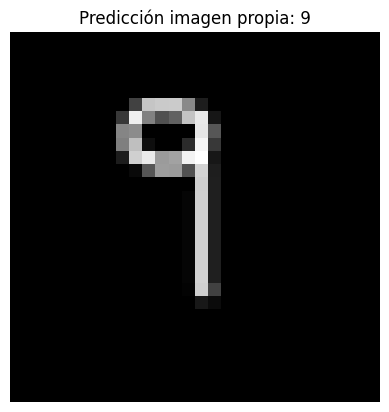

In [125]:
# ------------------- PARTE 5: CLASIFICACIÓN DE IMAGEN PROPIA -------------------

# Asegúrate de tener una imagen como 'mi_digito.png' en el mismo directorio
try:
    img = Image.open("mi_digito.png").convert("L")  # Escala de grises
    img = img.resize((28, 28))
    img = np.array(img)

    # Invertir colores si es necesario
    img = 255 - img

    img = img.astype('float32') / 255.0
    img = img.reshape(1, 28, 28, 1)

    # Predicción
    pred = model.predict(img)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Predicción imagen propia: {np.argmax(pred)}")
    plt.axis('off')
    plt.show()

except FileNotFoundError:
    print("No se encontró 'mi_digito.png'. Coloca tu imagen en el mismo directorio.")
